In [185]:
import pandas as pd
import allel
import seaborn as sns
import matplotlib.pyplot as plt


In [186]:
clim1001 = pd.read_csv('../key_files/1001g_regmap_grenet_ecotype_info_corrected_bioclim_2024May16.csv')

clim1001['ecotypeid'] = clim1001['ecotypeid'].astype(str)

ecotypeid_to_bio1 = clim1001.set_index('ecotypeid')['bio1'].to_dict()

In [187]:
samples = pd.read_csv('../key_files/merged_sample_table.csv')[['site', 'plot', 'generation', 'total_flower_counts']]

samples = samples.groupby(['site', 'plot', 'generation'])['total_flower_counts'].sum().reset_index()

samples['min_perc'] = 1/samples['total_flower_counts']

samples['code'] = samples['site'].astype(str) + '_'  + samples['generation'].astype(str) + '_' + samples['plot'].astype(str) 

ecotype_freq = pd.read_csv('../key_files/merged_ecotype_frequency.txt',sep = '\t')

clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/worldclim_sitesdata.csv')

clim_sites_during_exp = clim_sites_during_exp[['site', 'bio1']]

clim_sites_during_exp['site'] = clim_sites_during_exp['site'].astype(str)

In [188]:
grenenet_ecotypes = pd.read_csv('../key_files/founder_ecotype_frequency.txt', sep = '\t',header=None)[0]

ecotype_freq = ecotype_freq.set_index(grenenet_ecotypes)

ecotype_freq = ecotype_freq.T 
ecotype_freq = ecotype_freq.reset_index()
ecotype_freq['generation'] = ecotype_freq['index'].str.split('_').str[1]

In [189]:
ecotype_freq['plot'] = ecotype_freq['index'].str.split('_').str[2]

ecotype_freq['site'] = ecotype_freq['index'].str.split('_').str[0] 

In [190]:
ecotype_freq = ecotype_freq.drop('index', axis=1)

In [191]:
ecotype_freq = ecotype_freq.melt(id_vars = ['plot','site', 'generation'])

In [192]:
ecotype_freq.columns = ['plot','site', 'generation', 'ecotype', 'freq']

In [193]:
clim1001f = clim1001[['ecotypeid', 'bio1']]

In [194]:
#clim1001f = clim1001f[clim1001f['bio1'] > 13]

In [195]:
clim1001f['ecotypeid'] = clim1001f['ecotypeid'].astype(int)

/tmp/ipykernel_1081135/3068168531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['ecotypeid'] = clim1001f['ecotypeid'].astype(int)


In [196]:
ecotype_freq = ecotype_freq.merge(clim1001f, left_on = 'ecotype', right_on = 'ecotypeid')

In [197]:
ecotype_freq['generation'] = ecotype_freq['generation'].astype(int)

In [198]:
ecotype_freq.columns = ['plot', 'site', 'generation', 'ecotype', 'ecotype_freq', 'ecotypeid', 'bio1_ecotype']

In [199]:
ecotype_freq = ecotype_freq.merge(clim_sites_during_exp, on = 'site')

In [200]:
ecotype_freq.columns = ['plot', 'site', 'generation', 'ecotype', 'ecotype_freq', 'ecotypeid',
       'bio1_ecotype', 'bio1_site']

In [211]:
#ecotype_freq[(ecotype_freq['site']=='27') & (ecotype_freq['ecotype']==766)]

In [216]:
ecotype_to_climate = ecotype_freq[['ecotype', 'bio1_ecotype']].drop_duplicates().set_index('ecotype')['bio1_ecotype'].sort_values().to_dict()
climate_to_ecotype = ecotype_freq[['bio1_ecotype', 'ecotype']].drop_duplicates().set_index('bio1_ecotype')['ecotype'].sort_values().to_dict()

site_to_climate = ecotype_freq[['site', 'bio1_site']].drop_duplicates().set_index('site')['bio1_site'].sort_values().to_dict()
climate_to_site = ecotype_freq[['bio1_site', 'site']].drop_duplicates().set_index('bio1_site')['site'].sort_values().to_dict()

ecotype_freq['climatic_distance'] = ecotype_freq['bio1_ecotype'] - ecotype_freq['bio1_site']

distance_ecotypes_sites = ecotype_freq.pivot_table(index='ecotype', columns = 'site', values = 'climatic_distance')

# Map ecotype and site to bio1_climate, sort by climate, and then map back to ecotypes and sites
sorted_ecotypes = (ecotype_freq[['ecotype', 'bio1_ecotype']]
                   .drop_duplicates()
                   .set_index('ecotype')
                   ['bio1_ecotype']
                   .sort_values()
                   .index)

sorted_sites = (ecotype_freq[['site', 'bio1_site']]
                .drop_duplicates()
                .set_index('site')
                ['bio1_site']
                .sort_values()
                .index)

# Reorder the distance matrix by the sorted ecotypes and sorted sites
distance_ecotypes_sites_sorted = distance_ecotypes_sites.loc[sorted_ecotypes, sorted_sites]


In [217]:
distance_ecotypes_sites

site,1,10,11,12,13,2,23,24,25,26,...,49,5,52,53,54,55,57,6,60,9
ecotype,,,,,,,,,,,,,,,,,,,,,
159,0.604167,-10.466666,-2.845834,-2.537500,-10.349999,-5.333333,1.508333,3.912500,1.425000,-9.300000,...,-0.066667,-4.400001,0.058333,-0.229167,-1.462501,0.391666,-0.433333,-5.679167,-6.812501,-0.791667
265,4.241667,-6.829166,0.791666,1.099999,-6.712500,-1.695833,5.145833,7.550000,5.062500,-5.662500,...,3.570833,-0.762501,3.695833,3.408333,2.174999,4.029166,3.204166,-2.041667,-3.175001,2.845833
763,-11.716666,-22.787499,-15.166667,-14.858334,-22.670833,-17.654166,-10.812500,-8.408333,-10.895833,-21.620833,...,-12.387500,-16.720834,-12.262500,-12.550000,-13.783334,-11.929167,-12.754167,-18.000000,-19.133334,-13.112500
765,-11.208333,-22.279166,-14.658334,-14.350000,-22.162499,-17.145833,-10.304167,-7.900000,-10.387500,-21.112500,...,-11.879166,-16.212500,-11.754166,-12.041667,-13.275000,-11.420833,-12.245833,-17.491667,-18.625001,-12.604167
766,-13.004166,-24.074999,-16.454167,-16.145833,-23.958333,-18.941666,-12.100000,-9.695833,-12.183333,-22.908333,...,-13.675000,-18.008334,-13.550000,-13.837500,-15.070834,-13.216667,-14.041667,-19.287500,-20.420834,-14.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,-1.016666,-12.087499,-4.466667,-4.158333,-11.970832,-6.954166,-0.112500,2.291667,-0.195833,-10.920833,...,-1.687500,-6.020833,-1.562500,-1.850000,-3.083333,-1.229167,-2.054166,-7.300000,-8.433334,-2.412500
10013,3.712501,-7.358333,0.262500,0.570833,-7.241666,-2.224999,4.616667,7.020833,4.533333,-6.191667,...,3.041667,-1.291667,3.166667,2.879167,1.645833,3.500000,2.675000,-2.570833,-3.704167,2.316667
10014,5.341667,-5.729166,1.891666,2.200000,-5.612499,-0.595833,6.245833,8.650000,6.162500,-4.562500,...,4.670834,0.337500,4.795834,4.508333,3.275000,5.129167,4.304167,-0.941667,-2.075001,3.945833


<Axes: xlabel='site', ylabel='ecotype'>

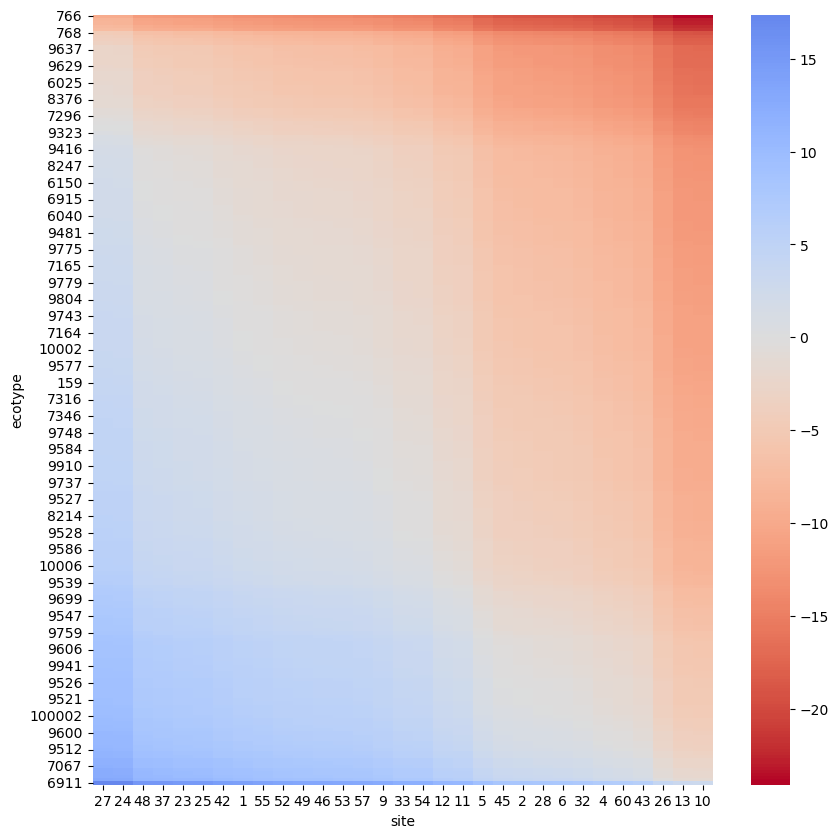

In [225]:
plt.figure(figsize=(10, 10))  # Set the size of the figure
sns.heatmap(distance_ecotypes_sites_sorted, cmap='coolwarm_r', center=0)

In [ ]:
ef_ecotypes_sites = ecotype_freq.pivot_table(index='ecotype', columns = 'site', values = 'ecotype_freq')


sorted_ecotypes = ef_ecotypes_sites.index.map(ecotype_to_climate).sort_values().map(climate_to_ecotype)

sorted_columns = ef_ecotypes_sites.columns.map(site_to_climate).sort_values().map(climate_to_site)

ef_ecotypes_sites = ef_ecotypes_sites.loc[sorted_ecotypes, sorted_columns]

from scipy.ndimage import gaussian_filter

# Convert DataFrame to a NumPy array for processing
data_matrix = ef_ecotypes_sites.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=4)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

plt.figure(figsize=(10, 10))
plt.matshow(smoothed_matrix, cmap='viridis',interpolation=None, aspect='auto',fignum=1)

In [278]:
import matplotlib as mpl


/tmp/ipykernel_1081135/1037256210.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar on the right


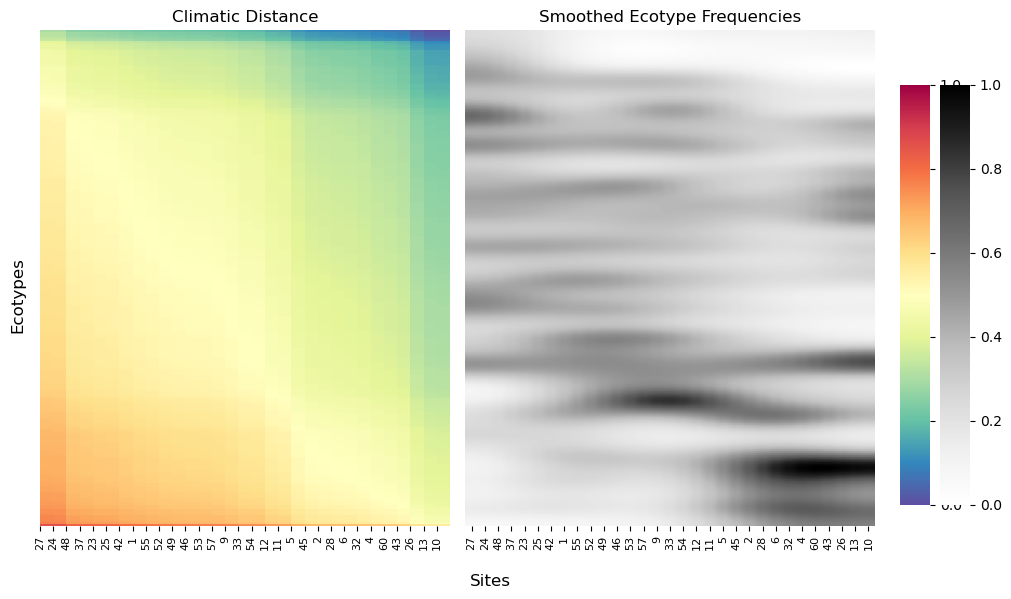

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter
import numpy as np

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# First heatmap (original sorted distance matrix) - no colorbar
sns.heatmap(distance_ecotypes_sites_sorted, cmap='Spectral_r', center=0, ax=ax1, cbar=False,
            xticklabels=True, yticklabels=False)

ax1.set_title("Climatic Distance")

# Set ticks for the first heatmap
ax1.set_xticks(np.arange(len(sorted_columns)))
ax1.set_xticklabels(sorted_columns, rotation=90, fontsize=8)
ax1.tick_params(bottom=True, top=False)  # Ensure ticks are at the bottom

ax1.set_ylabel('')

ax1.set_xlabel('')
# Second heatmap (smoothed frequency data)
# Convert DataFrame to a NumPy array for processing
data_matrix = ef_ecotypes_sites.to_numpy()

# Replace NaN values with 0 for smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=4)

# Set zeros back to NaN to ignore them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Plot the smoothed heatmap on the second axis without colorbar
cax2 = ax2.matshow(smoothed_matrix, cmap='Greys', interpolation=None, aspect='auto')

# Remove the black border from the second plot
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Set title for the second heatmap
ax2.set_title("Smoothed Ecotype Frequencies")
ax2.set_yticklabels([])
# Set ticks for the second heatmap
#ax2.set_xticks(np.arange(len(sorted_columns)))
# Ensure ticks and labels are at the bottom
ax2.tick_params(bottom=True, top=False, left=False)  # Ensure ticks are only at the bottom
ax2.set_xticks(np.arange(len(sorted_columns)))
ax2.set_xticklabels(sorted_columns, rotation=90, fontsize=8)

# Explicitly set the tick labels to the bottom
ax2.xaxis.set_label_position('bottom')  # Set the label position to the bottom
ax2.xaxis.tick_bottom()  # Make suect ratio to ensure same width

# Create a colorbar for the first heatmap using 'Spectral_r' colormap
cbar_ax1 = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # Position for the first colorbar

# Create a ScalarMappable to associate with the 'Spectral_r' colormap
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Spectral_r')
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed for colorbar

# Create the first colorbar
cbar1 = fig.colorbar(sm, cax=cbar_ax1)
cbar1.ax.tick_params(labelsize=10)
cbar1.outline.set_visible(False)  # Remove border

# Create a second colorbar for Ecotype Frequency
cbar_ax2 = fig.add_axes([0.95, 0.15, 0.03, 0.7])  # Position for the second colorbar

# Create the second ScalarMappable for the 'Greys' colormap (as in your second plot)
sm2 = mpl.cm.ScalarMappable(cmap='Greys', norm=norm)
sm2.set_array([])  # Needed for colorbar

# Create the second colorbar
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.ax.tick_params(labelsize=10)
cbar2.outline.set_visible(False)  # Remove border

fig.supxlabel('Sites')  # Set a common x-axis label for the entire figure
fig.supylabel('Ecotypes')  # Set a common x-axis label for the entire figure

# Adjust layout to make space for the colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar on the right
plt.show()


In [ ]:
ecotype_freq

In [283]:
ecotype_freq['climatic_distance_sq'] = ecotype_freq['climatic_distance']**2

In [ ]:
ecotype_freq['climatic_distance_sq'] = np.log(ecotype_freq['climatic_distance_sq'])

In [ ]:
ecotype_freq

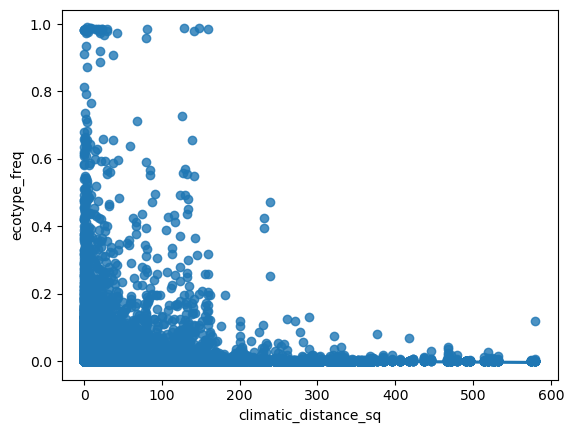

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fit a linear regression using Seaborn's regplot
sns.regplot(data=ecotype_freq, x='climatic_distance_sq', y='ecotype_freq')

# Display the plot
plt.show()


In [40]:
import numpy as np

In [ ]:
pd.pivot_table()

In [42]:
ecotype_freq['bio1_ecotype']

0         8.879167
1         8.879167
2         8.879167
3         8.879167
4         8.879167
            ...   
172090    9.887500
172091    9.887500
172092    9.887500
172093    9.887500
172094    9.887500
Name: bio1_ecotype, Length: 172095, dtype: float64

In [41]:
# Calculate the pairwise differences between the two columns
difference_matrix = np.subtract.outer(ecotype_freq['bio1_ecotype'], ecotype_freq['bio1_site'])

# Convert the difference matrix into a DataFrame if desired
difference_df = pd.DataFrame(difference_matrix, 
                             index=ecotype_freq['bio1_ecotype'], 
                             columns=ecotype_freq['bio1_site'])

MemoryError: Unable to allocate 221. GiB for an array with shape (172095, 172095) and data type float64

In [23]:
import numpy as np

In [24]:
# Assuming df is your DataFrame named ecotype_freq
# Ensure that the DataFrame contains only the relevant generations
df = ecotype_freq[ecotype_freq['generation'].isin([1, 2, 3])]

# Function to check if frequency increases
def is_increasing(group):
    # Ensure the group is sorted by generation
    group = group.sort_values(by='generation')
    # Check if the last frequency is greater than the first, given there are at least two data points to compare
    if len(group['freq']) > 1:
        return group['freq'].iloc[-1] > group['freq'].iloc[0]
    else:
        return np.nan  # Return False if not enough data to compare

# Group by site, plot, and ecotype, then apply the function and reset index properly
result = df.groupby(['site', 'plot', 'ecotype']).apply(is_increasing).reset_index(name='increased')


In [25]:
#import os

In [26]:
#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

In [30]:
result['increased'].value_counts()

increased
False    43045
True     14243
Name: count, dtype: int64

In [31]:
result = result.merge(clim_sites_during_exp, on ='site')

In [32]:
result

,site,plot,ecotype,increased,bio1
0,1,1,159,False,8.720833
1,1,1,265,True,8.720833
2,1,1,763,False,8.720833
3,1,1,765,False,8.720833
4,1,1,766,False,8.720833
...,...,...,...,...,...
82000,9,9,10011,False,10.116667
82001,9,9,10013,False,10.116667
82002,9,9,10014,False,10.116667
82003,9,9,100001,False,10.116667


In [33]:
result.columns = ['site', 'plot', 'ecotype', 'increased', 'bio1_exp']

In [34]:
result = result.merge(clim1001f, left_on = 'ecotype', right_on ='ecotypeid')

In [35]:
result = result.drop('ecotypeid',axis=1)

In [36]:
result.columns = ['site', 'plot', 'ecotype', 'increased', 'bio1_exp', 'bio1_ecotype']

In [37]:
result['bio1_exp'] = result['bio1_exp'].round(2)
result['bio1_ecotype'] = result['bio1_ecotype'].round(2)

In [38]:
bioexp_vs_bioecotype = result.pivot_table(index = 'bio1_exp', columns = 'bio1_ecotype', values= 'increased' )

In [39]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.sort_index() 

In [40]:
sorted_columns = sorted(bioexp_vs_bioecotype.columns)
bioexp_vs_bioecotype = bioexp_vs_bioecotype[sorted_columns]

In [41]:
clim1001f['bio1'] = clim1001f['bio1'].round(2)

/tmp/ipykernel_1080388/1059384320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['bio1'] = clim1001f['bio1'].round(2)


In [42]:
clim1001f['ecotype_bio1'] = clim1001f['ecotypeid'].astype(str) + '_' + clim1001f['bio1'].astype(str)

/tmp/ipykernel_1080388/2563707021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['ecotype_bio1'] = clim1001f['ecotypeid'].astype(str) + '_' + clim1001f['bio1'].astype(str)


In [43]:
clim1001f_dcit = clim1001f.set_index('bio1')['ecotype_bio1'].to_dict()

In [44]:
bioexp_vs_bioecotype.columns = bioexp_vs_bioecotype.columns.map(clim1001f_dcit)

In [45]:
clim_sites_during_exp['bio1'] = clim_sites_during_exp['bio1'].round(2)

In [46]:
clim_sites_during_exp['site_bio1'] = clim_sites_during_exp['site'].astype(str) + '_' + clim_sites_during_exp['bio1'].astype(str)

In [47]:
clim_sites_during_exp_dict = clim_sites_during_exp.set_index('bio1')['site_bio1'].to_dict()

In [48]:
bioexp_vs_bioecotype.index = bioexp_vs_bioecotype.index.map(clim_sites_during_exp_dict)

In [49]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.fillna(0)

In [50]:
bioexp_vs_bioecotype

bio1_ecotype,766_-4.28,7298_-3.27,763_-3.0,765_-2.49,9766_-1.93,768_0.72,9634_1.22,772_1.62,8354_1.88,9632_2.66,...,9879_16.59,9522_16.62,9726_17.17,9559_17.18,7067_17.23,7063_17.7,9657_17.75,9944_17.84,6939_18.33,6911_22.7
bio1_exp,,,,,,,,,,,,,,,,,,,,,
27_5.34,0.100000,0.300000,0.400000,0.200000,0.200000,0.100000,0.100000,0.200000,0.200000,0.200000,...,0.100000,0.300000,0.300000,0.200000,0.200000,0.100000,0.200000,0.300000,0.200000,0.300000
24_5.41,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000
48_7.33,0.000000,0.800000,0.200000,0.200000,0.200000,0.000000,0.000000,0.200000,0.200000,0.000000,...,0.600000,0.400000,0.200000,0.800000,0.600000,1.000000,0.200000,0.400000,0.800000,0.400000
25_7.9,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333
42_8.34,0.000000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,0.400000,0.400000,0.200000,0.300000,0.200000,0.100000,0.200000,0.200000,0.200000,0.200000
1_8.72,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.083333,0.083333,...,0.000000,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333
55_8.93,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.200000,0.200000,0.100000,0.100000,0.000000,0.100000,0.100000,0.200000,0.100000,0.100000
52_9.27,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
49_9.39,0.363636,0.272727,0.363636,0.272727,0.363636,0.181818,0.181818,0.363636,0.181818,0.181818,...,0.000000,0.090909,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.181818,0.000000


In [51]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.T

In [52]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.T

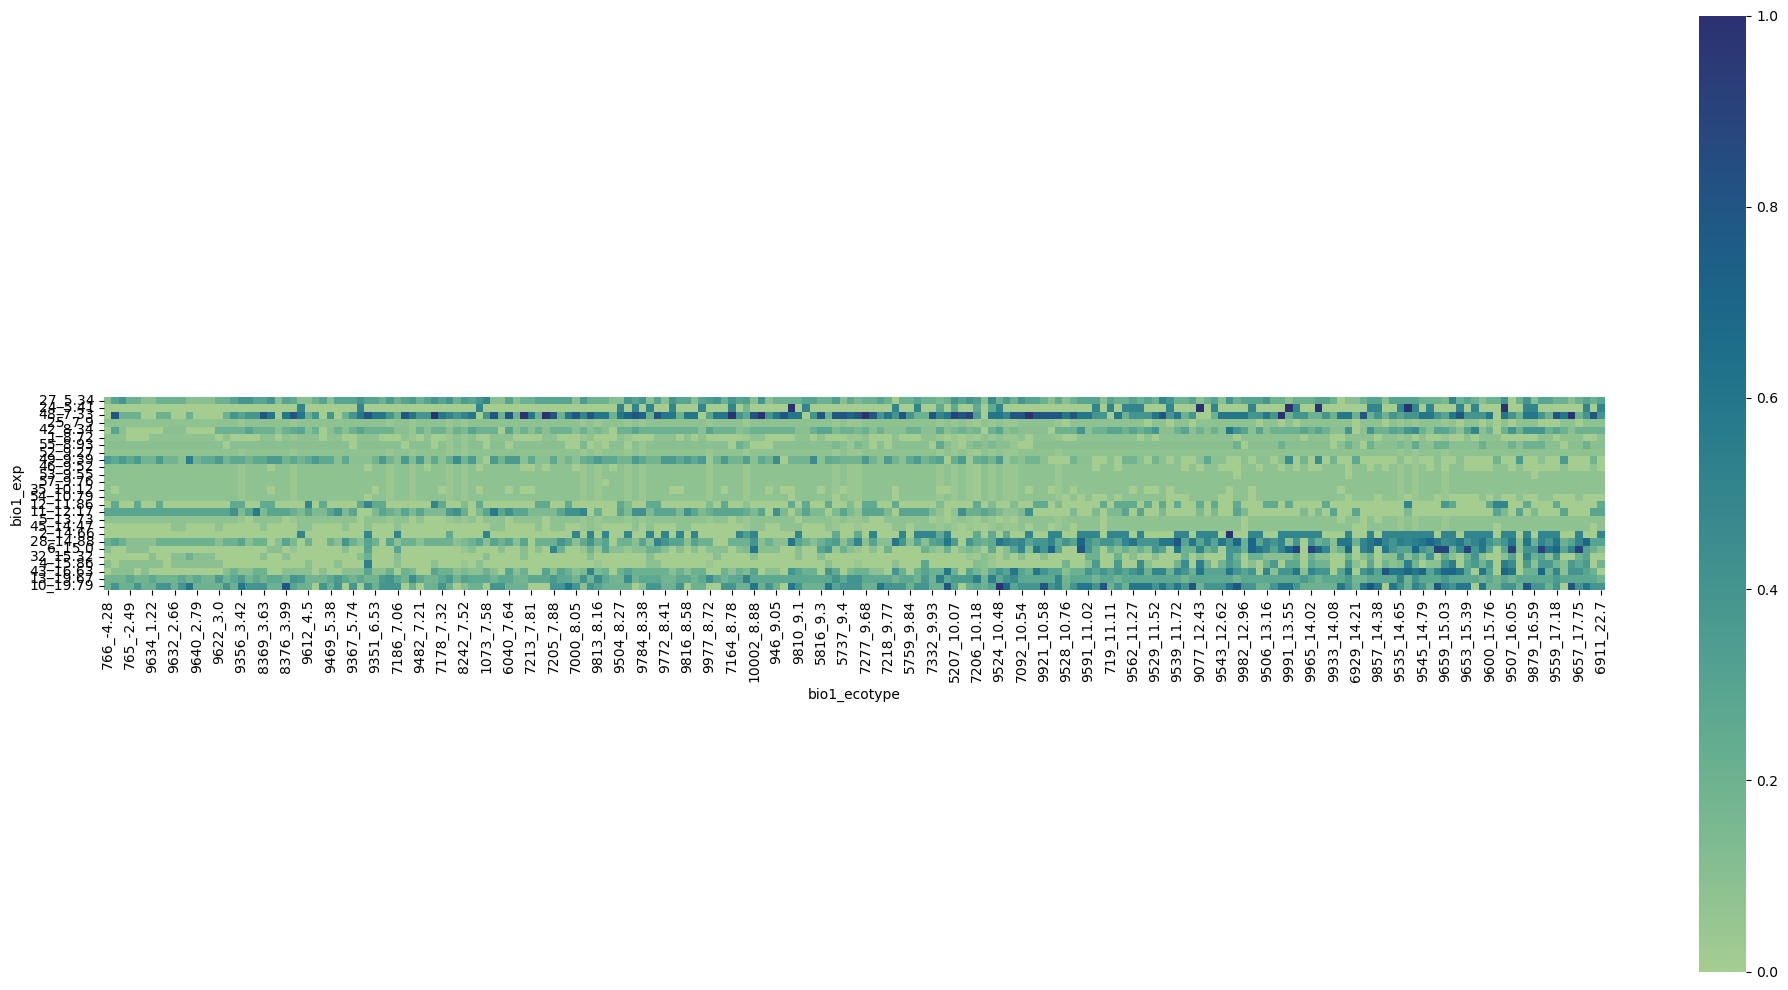

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bioexp_vs_bioecotype is your DataFrame
plt.figure(figsize=(20, 10))  # Set the size of the figure

# Create the heatmap with a horizontal color bar at the top
ax = sns.heatmap(bioexp_vs_bioecotype, cmap="crest",     square=True,
) # cbar_kws={'orientation': 'horizontal', 'label': 'Color scale', 'location': 'top'}

# Optionally adjust layout to make room for tick labels
plt.tight_layout()
#plt.savefig('bio1_exp_vs_collectionsite.png')
# Show the plot
plt.show()

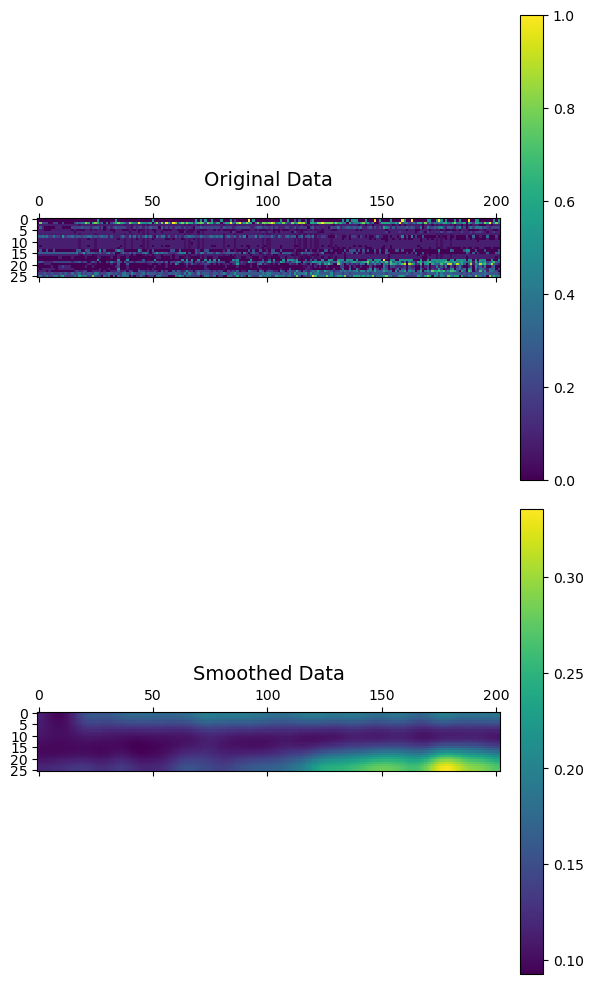

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Convert DataFrame to a NumPy array for processing
data_matrix = bioexp_vs_bioecotype.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=5)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Create taller figure with more height
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=(6, 10))  # Taller rather than wider

# Plot the original data
cax1 = ax1.matshow(data_matrix, cmap='viridis')
ax1.set_title("Original Data", fontsize=14)
fig.colorbar(cax1, ax=ax1, fraction=0.046, pad=0.04)  # Adjust colorbar size

# Plot the smoothed data
cax2 = ax2.matshow(smoothed_matrix, cmap='viridis')
ax2.set_title("Smoothed Data", fontsize=14)
fig.colorbar(cax2, ax=ax2, fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 2000x600 with 0 Axes>

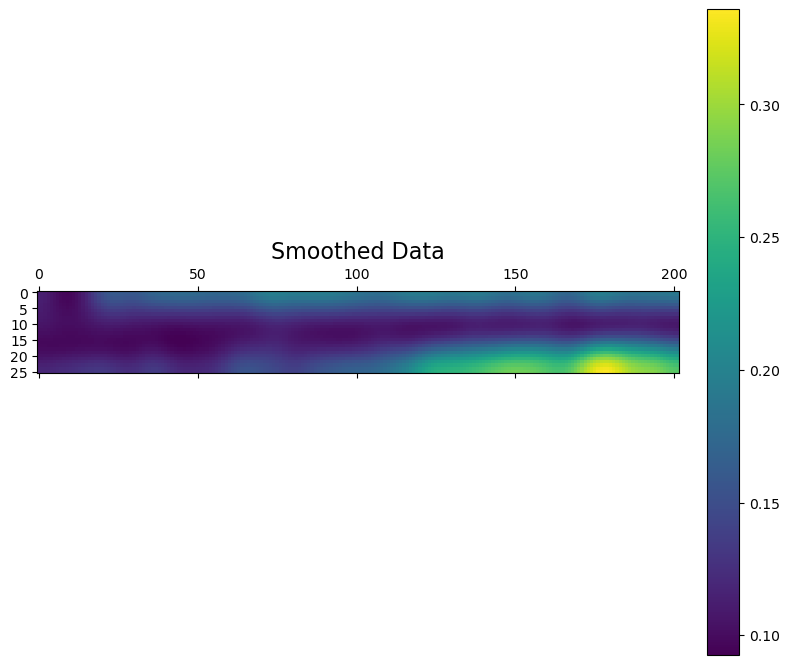

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(20, 6))
# Assuming bioexp_vs_bioecotype is already available as your DataFrame
# Convert DataFrame to NumPy array for processing
data_matrix = bioexp_vs_bioecotype.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=5)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Create a larger figure specifically for the smoothed plot
fig, ax = plt.subplots(figsize=(8, 10))  # Make the plot bigger with 8 width and 10 height

# Plot the smoothed data
cax = ax.matshow(smoothed_matrix, cmap='viridis')

# Add a title with larger font size
ax.set_title("Smoothed Data", fontsize=16)

# Add colorbar and adjust its size
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()


In [63]:
smoothed_matrix

array([[0.11461181, 0.11363203, 0.11177809, ..., 0.19113038, 0.19160324,
        0.19186659],
       [0.1143964 , 0.11343994, 0.11163039, ..., 0.18762217, 0.18806579,
        0.18831337],
       [0.11399862, 0.11308692, 0.11136253, ..., 0.18092298, 0.18131195,
        0.18153005],
       ...,
       [0.11453456, 0.11467684, 0.11495686, ..., 0.26558645, 0.26353787,
        0.26244231],
       [0.11713564, 0.11729357, 0.11760378, ..., 0.27181448, 0.26974996,
        0.26864486],
       [0.11854963, 0.11871581, 0.11904188, ..., 0.27495911, 0.27288909,
        0.27178053]])

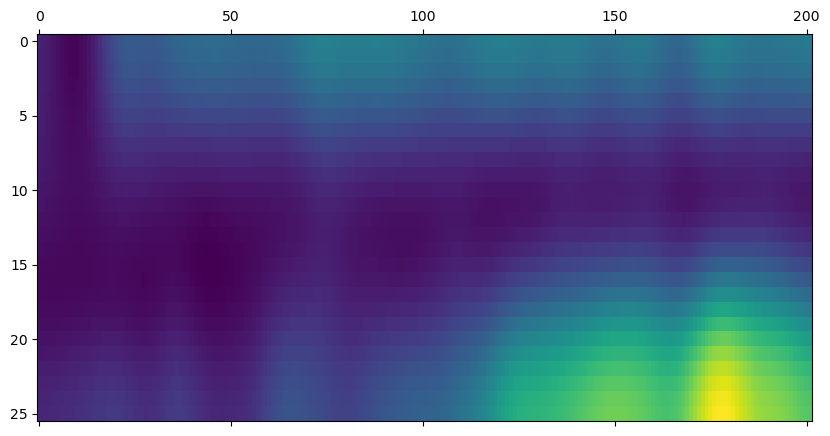

In [68]:
plt.figure(figsize=(10,5))
plt.matshow(smoothed_matrix, cmap='viridis',interpolation=None, aspect='auto',fignum=1)